# Tensorflow/Keras for Regression

We're going to use a Kaggle dataset that maps 20 house features to price values:

https://www.kaggle.com/harlfoxem/housesalesprediction

Great for testing simple regression models.
The data points are from King Couty, Seattle, USA.

Features:
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.shape

(21597, 21)

### 1. Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check if there are missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Check description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price', ylabel='Count'>

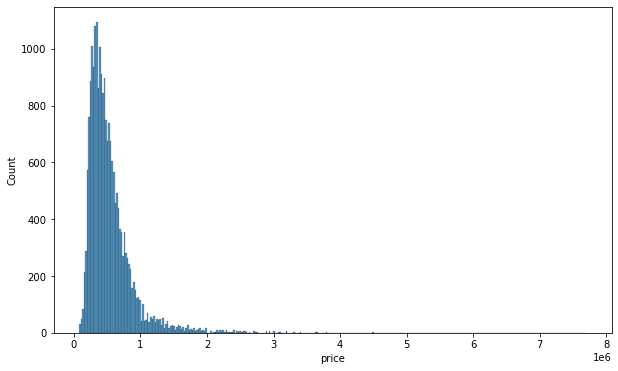

In [7]:
# Always interesting to plot the distribution of the predicted dependent variable
plt.figure(figsize=(10,6))
sns.histplot(df['price'])

In [8]:
# Always compute correlations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

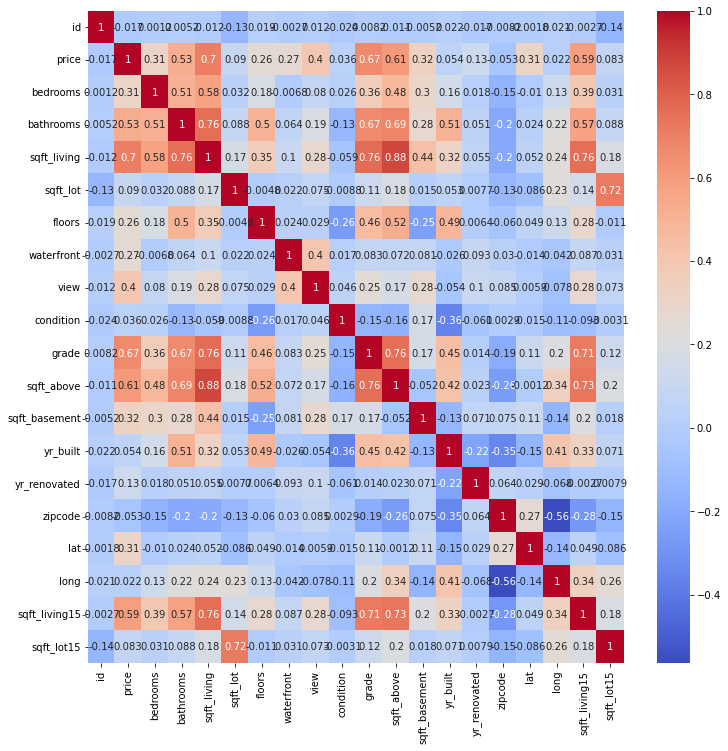

In [10]:
# Visualize correlations with a heatmap
# Make note of the most correlated pairs
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [13]:
# Always compute correlations and check the sorted correlation list wrt the predicted variable!
# Here, sqft_living (living space) seems to be the most correlated, as expected
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

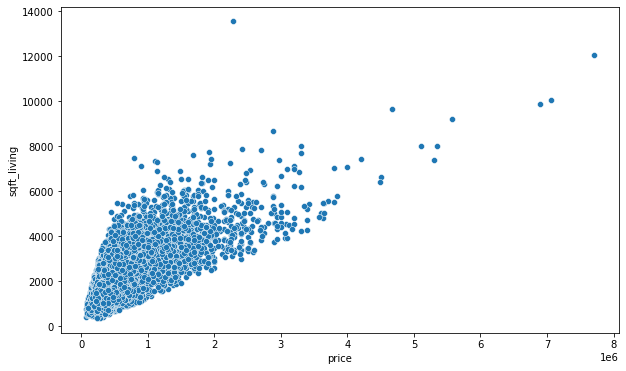

In [14]:
# Make scatterplots of the highly correlated features
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

/Users/mxagar/anaconda3/envs/3d/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

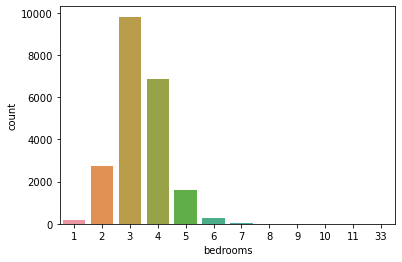

In [16]:
# Perfom boxplots & countplots of categorical data which has high correlation values with dependent/predicted variable
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

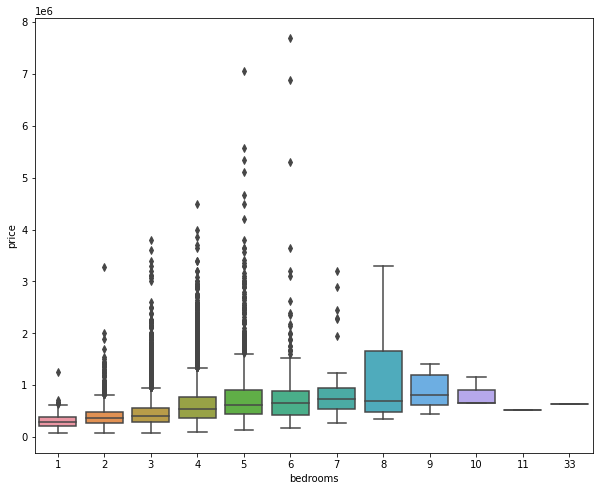

In [18]:
# Always intepret data: variance increases with number of bedrooms
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms',y='price',data=df)

In [19]:
# Geographical data with long & lat features

<AxesSubplot:xlabel='long', ylabel='price'>

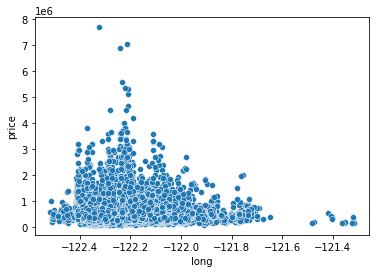

In [21]:
# First, check the effect of long & lat in price using scatterplots
# We see that there are long and lat values in which highest prices accumulate
sns.scatterplot(data=df,x='long',y='price')

<AxesSubplot:xlabel='lat', ylabel='price'>

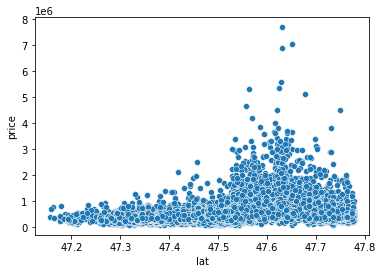

In [22]:
sns.scatterplot(data=df,x='lat',y='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

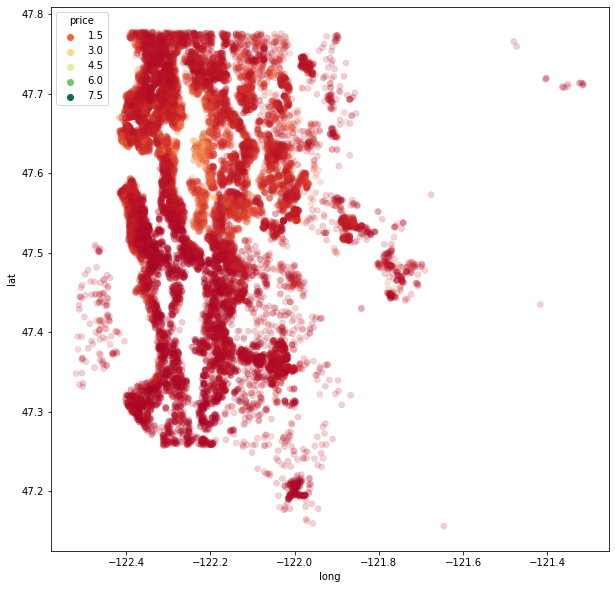

In [24]:
# Seaborn/Matplotlib cannot directly plot geo data, but we can plot scatterplots with long & lat data!
plt.figure(figsize=(10,10))
#plt.scatter(df.long, df.lat, alpha = .8, c = df.price, cmap = 'seismic')
#plt.colorbar()
sns.scatterplot(data=df,x='long',y='lat',hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')

In [25]:
# The color distribution is not as marked because we're plotting some high prices
# that break our colors
# From the histplot we see that everything above 2.5M could be an outlier for coloring purposes
df['price'].sort_values(ascending=False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [26]:
df.shape

(21597, 21)

In [27]:
# 1% threshold
threshold = int(0.01*df.shape[0])
threshold

215

In [28]:
# We see the price if we remove the top 1%
# It is below that visually derived 2.5M
df.sort_values('price',ascending=False).iloc[threshold]['price']

1970000.0

In [29]:
# We create a new dataframe without the top 1% price points
# only for coloring purposes
df_1 = df.sort_values('price',ascending=False).iloc[threshold:]

<AxesSubplot:xlabel='long', ylabel='lat'>

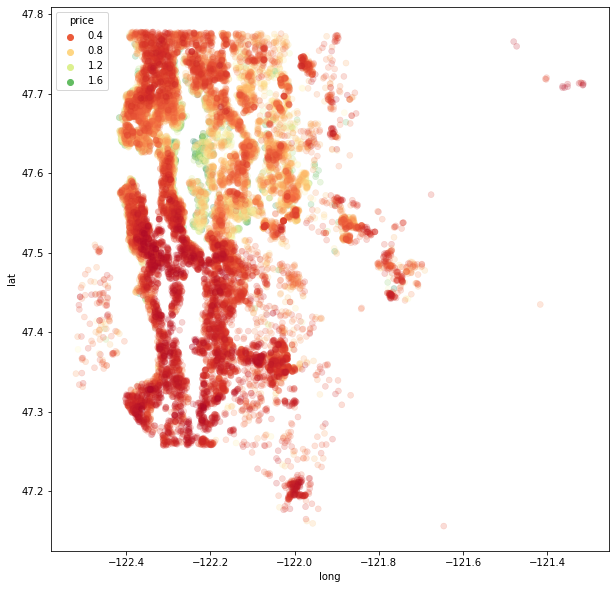

In [30]:
# We plot again without the top 1%
# Now it is clear where the most expensive area is, close to the shore
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_1,x='long',y='lat',hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

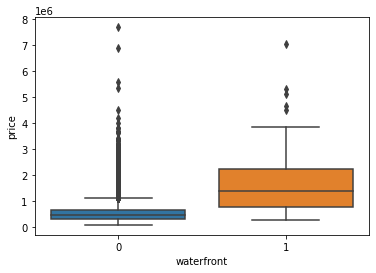

In [31]:
# Actually, waterfront is a feature, we can check it with a boxplot
# We see it actually seems to have an effect
sns.boxplot(data=df,x='waterfront',y='price')

### 2. Data Preprocessing / Cleaning

In [34]:
# Get rid of features we don't want, eg id
df.drop('id',axis=1,inplace=True)

In [35]:
# Date: it is a string -> convert to datetime objects!
# We can easily extract more information from a datetime object
df['date'] = pd.to_datetime(df['date'])

In [36]:
# Feature engineering = we extract new features from current features
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

<AxesSubplot:xlabel='month', ylabel='price'>

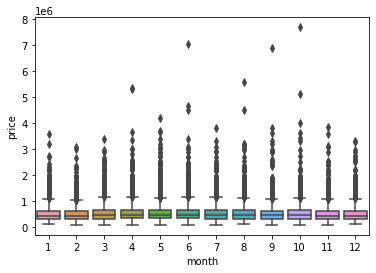

In [37]:
# Is there any difference in prices for different months?
# The box plot does not help much visually here, but we need to try it always
sns.boxplot(x='month',y='price',data=df)

In [38]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

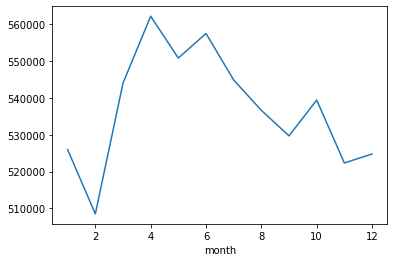

In [39]:
# There seem to be some differences
df.groupby('month').mean()['price'].plot()

In [40]:
# Difference of prices by year?
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

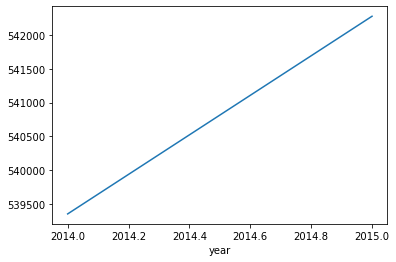

In [42]:
df.groupby('year').mean()['price'].plot()

In [43]:
# Average anual price increase: 0.5%
p_2014 = df.groupby('year').mean()['price'].loc[2014]
p_2015 = df.groupby('year').mean()['price'].loc[2015]
increase = (p_2015 - p_2014) / p_2014

In [44]:
increase

0.005428922131076952

In [45]:
# We now get rid of date and remain with year and month
df.drop('date',axis=1,inplace=True)

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [47]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [48]:
# Zip codes are an issue in this kind of datasets
# They might be correlated with prices
# BUT they might get confused to be continuous, but they are not
# After a quick check, we see there are 70 codes, too much for one-hot dummy variables
# We could start grouping them using the zip code map, but that's a lot of work
# Therefore, in this case, we drop the feature

In [49]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [50]:
df['zipcode'].nunique()

70

In [51]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [52]:
df.drop('zipcode',axis=1,inplace=True)

In [53]:
# Year renovated is another issue
# Many have year of renovation 0, which means they're not renovated
# We could pick a threshold of for year of renovation
# And create a new feture renovated yes/no
# In this case, we can leave it as it is, because: both year and price increase together

In [54]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [55]:
# Something similar happens with sqft_basement
# There are many entries with value 0
# In this case, we leave it as is
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

#### Extract variables & scale them

In [56]:
# Get data in numpy format
X = df.drop('price',axis=1).values
y = df['price'].values

In [57]:
# Train/Test split
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Fit + transform
X_train = scaler.fit_transform(X_train)

In [62]:
# Only transform, use the fitting of the train data
X_test = scaler.transform(X_test)

### 3. Create Model + Train

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
# Since we have 19 features, it makes sense create a network with 19 input neurons
X_train.shape

(15117, 19)

In [65]:
model = Sequential()

# We add 4 layers, fully connected at the begining
# We can optimize that later
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# One final neuron to predict price: linear activation (default) for regression
model.add(Dense(1))

# Adam = adaptive gradient descend -> it works very well
model.compile(optimizer='adam',loss='mse')

In [66]:
# Train
# We can pass validation data! -> X_test, y_test
# Validation data is not used to update weights, but to check how well we're training
# We can prevent overfitting with early stopping
# When dataset it big, it is common to feed the network in batches
# Batch sizes come typically in powers of 2
# Usually, smaller batch sizes mean longer training times,
# because the network is fed with less data simultaneously
# However, smaller batch sizes tend to have less overfitting, because less data is passed at once
# Epochs: we pass a lage value, later we see how to do early stopping
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 14ms/step - loss: 436028671317.3333 - val_loss: 418864693248.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 450592167253.3333 - val_loss: 412775612416.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 403323530717.8666 - val_loss: 360060125184.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 337427275776.0000 - val_loss: 207531737088.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 174385441450.6667 - val_loss: 100321181696.0000
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: 113206399180.8000 - val_loss: 94612332544.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 98472746803.2000 - val_loss: 92988571648.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 98577802103.4667 - val_loss: 91301265408.0000
Epoch 9/400
119/119 

<AxesSubplot:>

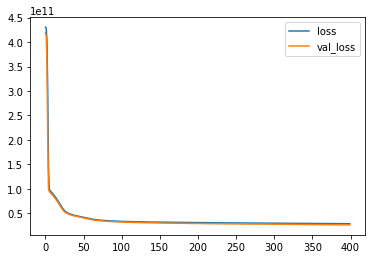

In [67]:
# We can always get loss history with
# model.history.history
# If we pass validation data, we get a dictionary with loss and val_loss
# Always convert that to a DataFrame and plot curves
# In this case, both curves decrease -> good, we could've continues training without overfitting
# BUT: we see that after epoch 50 aprox, there's small decrease of loss
losses = pd.DataFrame(model.history.history)
losses.plot()

### 4. Evaluate Model

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [69]:
model.evaluate(X_test, y_test)

203/203 [==============================] - 0s 2ms/step - loss: 26496409600.0000


26496409600.0

In [78]:
y_pred = model.predict(X_test)

In [79]:
mean_error = mean_squared_error(y_test, y_pred)**0.5

In [80]:
mean_error

162777.21761108947

In [81]:
mean_absolute_error(y_test, y_pred)

101092.00485026042

In [82]:
# To check whether sqrt(MSE)=150k is good enough, check the price range
# mean, min, max = 540k, 78k, 7.7m
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [83]:
# We see the error is roughly 27% of the mean
# That's not so good
mean_error / df.describe()['price']['mean']

0.3012738292137411

In [84]:
# We check the explained variance: how much of the variance is explained?
# The value seems to be OK: 83%
# Maybe we should keep training?
explained_variance_score(y_test, y_pred)

0.8002357296494313

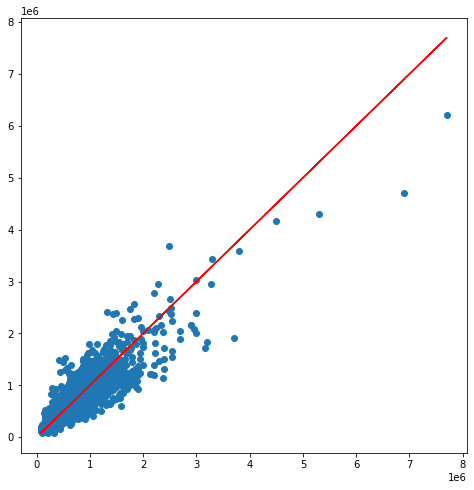

In [86]:
# Plot scatterplot to further investigate if the model is good enough
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
# Plot the ideal line
plt.plot(y_test,y_test,'r')

Something very interesting can be learned from the plot: as the price increases, the variance increases and therefore the prediction is worse. **We could consider training our model with the bottom price ranges, which are additionally a large % of the total samples**. Thus, we would have a model for the majority of the houses with an expected price close to the mean!

In [87]:
# We also can plot the distribution/historgram of the errors
# BUT: check the vector shapes...
y_test.shape

(6480,)

In [88]:
y_pred.shape

(6480, 1)

In [89]:
y_pred.reshape(6480).shape

(6480,)

In [90]:
errors = y_test - y_pred.reshape(6480)

In [91]:
errors.shape

(6480,)

<AxesSubplot:ylabel='Count'>

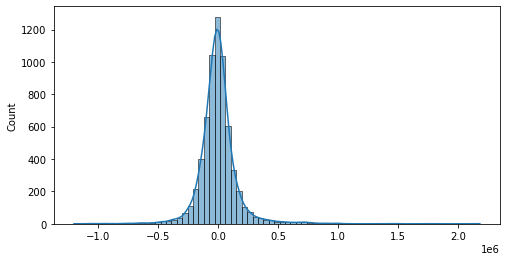

In [92]:
plt.figure(figsize=(8,4))
#plt.hist(errors,bins=50)
sns.histplot(errors,bins=75,kde=True)

### 5. Inference

In [93]:
# We pick a single random house
single_house = df.drop('price',axis=1).iloc[101]
single_house

bedrooms            3.0000
bathrooms           2.0000
sqft_living      1980.0000
sqft_lot         3478.0000
floors              1.5000
waterfront          0.0000
view                0.0000
condition           4.0000
grade               7.0000
sqft_above       1440.0000
sqft_basement     540.0000
yr_built         1929.0000
yr_renovated        0.0000
lat                47.6775
long             -122.3720
sqft_living15    1610.0000
sqft_lot15       3478.0000
year             2014.0000
month              10.0000
Name: 101, dtype: float64

In [94]:
# Reshape and scale the data
# Reshape: we need to nest the array in another array because we have used a matrix before
# That is done with .reshape(-1,size of a single datapoint)
single_house = single_house.values.reshape(-1,19)
single_house = scaler.transform(single_house)

In [158]:
prediction = model.predict(single_house)

In [159]:
prediction

array([[583248.56]], dtype=float32)

In [160]:
# True value
df['price'].iloc[101]

555000.0